# Práctica 1 - Self-Organising Maps - COLORES
## Preparación de entorno
#### Importar librerías de código

In [216]:
# from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline

#### Dataset que se va a utilizar para el entrenamiento

In [217]:
# Código para obtener el Dataset que se va a usar en el entrenamiento
valor_min=0
valor_max=256

valores_color=3
num_colores=1000
datos = np.random.randint(valor_min, valor_max, (valores_color, num_colores)) # los valores de muestreo
datos=datos.T #hacemos la transpuesta

## SOM Setup
#### Variables definidas por el alumno

In [218]:
# Inicializa tamaño del mapa de Kohonen, número de iteraciones y learning rate
# Inicializa normalizar_datos dependiendo de si tienes que normalizar los datos o no
lado_mapa = 30 #30*30 =900, tendremos 900 neuronas
periodo = 40000 # las veces que se repite
learning_rate =  0.1 # la neurona se desplaza un 20% al aprender
normalizar_datos = True #normalizamos los datos

#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

In [219]:
# Establece el numero de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utiliza una función que obtenga automáticamente los valores a partir del Dataset.
num_entradas = valores_color
num_datos = num_colores

# Calcula el vecindario inicial. Debe ser la mitad del lado del mapa de Kohonen
vecindario = lado_mapa / 2

# Normaliza los datos si fuese necesario dividiendo cada dato por el máximo en la matriz
if normalizar_datos:
    datos = datos/ (valor_max-1) # pasamos los valores de 0-255 a 0-1
    
# Crea una matriz de pesos con valores random entre 0 y 1. Usa la función random.random de la librería NumPy
matriz_pesos = np.random.random([lado_mapa,lado_mapa,num_entradas])# lo ponemos directamente 30,30,3

#### Funciones para entrenar/clasificar

In [220]:
# Función para encontrar la BMU
"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_idx) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bum_idx: coordenadas de la neurona ganadora
"""
def calcular_bmu(patron_entrada, m_pesos, m):
    NumeroNeuronas=m_pesos.shape[0]*m_pesos.shape[1]
    suma=0.0
    bmu_idx=[0,0]
    for x in range(m_pesos.shape[0]):
        for x2 in range(m_pesos.shape[1]):
            if normalizar_datos: #si esta normalizado, el producto escalar mayor
                if (x==0 and x2==0) or np.sum(m_pesos[x][x2] * patron_entrada)>suma:
                    suma=np.sum(m_pesos[x][x2] * patron_entrada)
                    bmu=m_pesos[x][x2]
                    bmu_idx[0]=x
                    bmu_idx[1]=x2
            else: #si no esta normalizado distancia euclídea menor
                pass #hay que hacerlo  
    return bmu,bmu_idx

In [221]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta)
"""
   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
   Entradas: (learning_rate_inicial, iteracion, período)
   Salidas:  learning_rate para la iteración i

"""
def variacion_learning_rate(lr_inicial, i, n_iteraciones):
    learning_rate=lr_inicial*(1-(i/ n_iteraciones))
    return learning_rate

In [222]:
# Función para calcular el descenso del vecindario (v)
"""
   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
   Entradas: (vecindario_inicial, iteracion, período)
   Salidas:  lvecindario para la iteración i

"""
def variacion_vecindario(vecindario_inicial, i, n_iteraciones):
    lvecindario=1+vecindario_inicial*(1-(i/ n_iteraciones))
    return lvecindario

In [223]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta) en función de la distancia a la BMU
"""
   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
   Entradas: (distancia_BMU, vecindario_actual)
   Salidas:  amortiguación para la iteración

"""
def decay(distancia_BMU, vecindario_actual):
    return np.exp(-distancia_BMU**2 / (2*vecindario_actual**2))

#### Funciones para dibujar la salida de la red

In [224]:
# Función para pintar una matriz de valores como colores RGB
def pintar_mapa(matriz_valores):
    fig = plt.figure()
    
    # Establece ejes
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, matriz_pesos.shape[0]+1))
    ax.set_ylim((0, matriz_pesos.shape[1]+1))
    ax.set_title('Self-Organising Map después de %d iteraciones' % periodo)

    # Dibuja los rectángulos de color RGB
    for x in range(1, matriz_valores.shape[0] + 1):
        for y in range(1, matriz_valores.shape[1] + 1):
            ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                         facecolor=matriz_valores[x-1,y-1,:],
                         edgecolor='none'))
    plt.show()

## SOM Entrenamiento

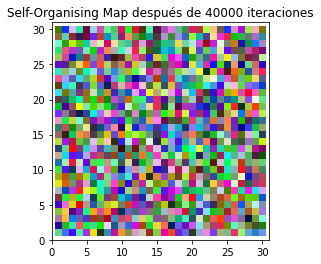

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000


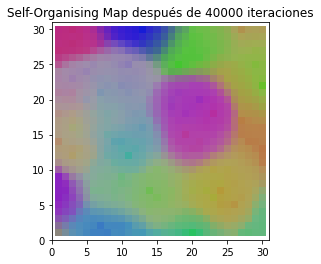

In [225]:
# Entrena la red con el dataset de entrenamiento
pintar_mapa(matriz_pesos)
for iteracion in range(periodo):
    aleatorio=np.random.randint(num_datos)
    
    ValoresEscogidos=datos[aleatorio]
 
    bmu,bmu_idx=calcular_bmu(ValoresEscogidos,matriz_pesos,num_entradas)    
    
    learning_rate_actual=variacion_learning_rate(learning_rate,iteracion,periodo)
    matriz_pesos[bmu_idx[0]][bmu_idx[1]]+=learning_rate_actual*(ValoresEscogidos-bmu)
    
    vecindario_actual=variacion_vecindario(vecindario,iteracion,periodo)
    
    for x in range(matriz_pesos.shape[0]):
        for x2 in range(matriz_pesos.shape[1]):
            distancia =np.sqrt((bmu_idx[0] - x)**2 + (bmu_idx[1] - x2)**2)
            if distancia<=vecindario_actual and distancia != 0: #esto no cambiara tmabien la BMU??????? , si distacia ==0 no deberia entrar,no?????
                amortiguacion=decay(distancia,vecindario_actual)
                matriz_pesos[x][x2]+= amortiguacion*learning_rate_actual*(bmu-matriz_pesos[x][x2])
    
    if (iteracion+1)%1000==0: 
        print(iteracion+1)
pintar_mapa(matriz_pesos)

## SOM Clasificación

In [226]:
# Clasifica los patrones de entrenamiento con la matriz de pesos recién entrenada



## SOM Prueba

In [227]:
# Clasifica nuevos patrones
#print(datos)